In [3]:
# load in libraries
import pandas as pd
from plotnine import *

In [31]:
# load in data

metro = pd.read_csv("/Users/chloefeehan/Desktop/python/GSB544/Project/data/metro.csv")
#emissions = pd.read_csv("/Users/chloefeehan/Desktop/python/GSB544/Project/data/emissions.csv")
energy = pd.read_csv("/Users/chloefeehan/Desktop/python/GSB544/Project/data/energy.csv")

In [58]:
metro["total_ridership"] = metro["total_ridership"].replace(',', '', regex=True).astype(int)
metro["total_miles"] = metro["total_miles"].replace(',', '', regex=True).astype(int)

metro.head()

,year,quarter,day_type,transportation_type,total_ridership,total_miles
0,2017,1,weekday,directly operated bus,54133957,221272646
1,2017,1,saturday,directly operated bus,6639676,26778396
2,2017,1,sunday,directly operated bus,5621850,23463404
3,2017,1,weekday,purchased bus,2639171,12454319
4,2017,1,saturday,purchased bus,286740,1337732


In [75]:
energy['Year'] = energy['YYYYMM'].astype(str).str[:4]
energy['Month'] = energy['YYYYMM'].astype(str).str[4:]

energy_clean = energy[(energy["Description"] == "Total Energy Consumed by the Transportation Sector") &
                        (energy['Year'] >= "2017") & (energy['Year'] <= "2021") &
                        (energy["Month"] != '13')]
energy_clean = energy_clean.rename(columns = {"Year" : "year"})
energy_clean["year"] = energy_clean["year"].astype(int)

energy_clean['Month'] = pd.to_numeric(energy_clean['Month'], errors='coerce')
energy_clean['quarter'] = energy_clean['Month'].apply(lambda x: (x - 1) // 3 + 1)
energy_clean["Value"] = energy_clean["Value"].astype(float)
energy_clean['emissions'] = energy_clean.groupby(['year', 'quarter'])['Value'].transform('sum')
energy_clean = energy_clean.drop_duplicates(subset=['year', 'quarter'])

energy_clean = energy_clean[["emissions", "year", "quarter"]]
energy_clean.head()


,emissions,year,quarter
6833,6658.236,2017,1
6836,7095.445,2017,2
6839,7232.977,2017,3
6842,7060.606,2017,4
6846,6757.611,2018,1


In [76]:
data_clean = metro.merge(energy_clean, on=['year', "quarter"], how='left')
data_clean.head()

,year,quarter,day_type,transportation_type,total_ridership,total_miles,emissions
0,2017,1,weekday,directly operated bus,54133957,221272646,6658.236
1,2017,1,saturday,directly operated bus,6639676,26778396,6658.236
2,2017,1,sunday,directly operated bus,5621850,23463404,6658.236
3,2017,1,weekday,purchased bus,2639171,12454319,6658.236
4,2017,1,saturday,purchased bus,286740,1337732,6658.236


In [77]:
data_clean.describe()

,year,quarter,total_ridership,total_miles,emissions
count,180.000000,180.000000,1.800000e+02,1.800000e+02,180.00000
mean,2019.000000,2.500000,8.847688e+06,3.992344e+07,6836.98735
std,1.418158,1.121153,1.435451e+07,6.149834e+07,502.52618
min,2017.000000,1.000000,1.467170e+05,5.875420e+05,5347.63400
25%,2018.000000,1.750000,1.130855e+06,6.041932e+06,6619.72875
50%,2019.000000,2.500000,2.618132e+06,1.486450e+07,7038.14500
75%,2020.000000,3.250000,6.997755e+06,2.874322e+07,7168.28975
max,2021.000000,4.000000,5.569572e+07,2.411258e+08,7414.93300


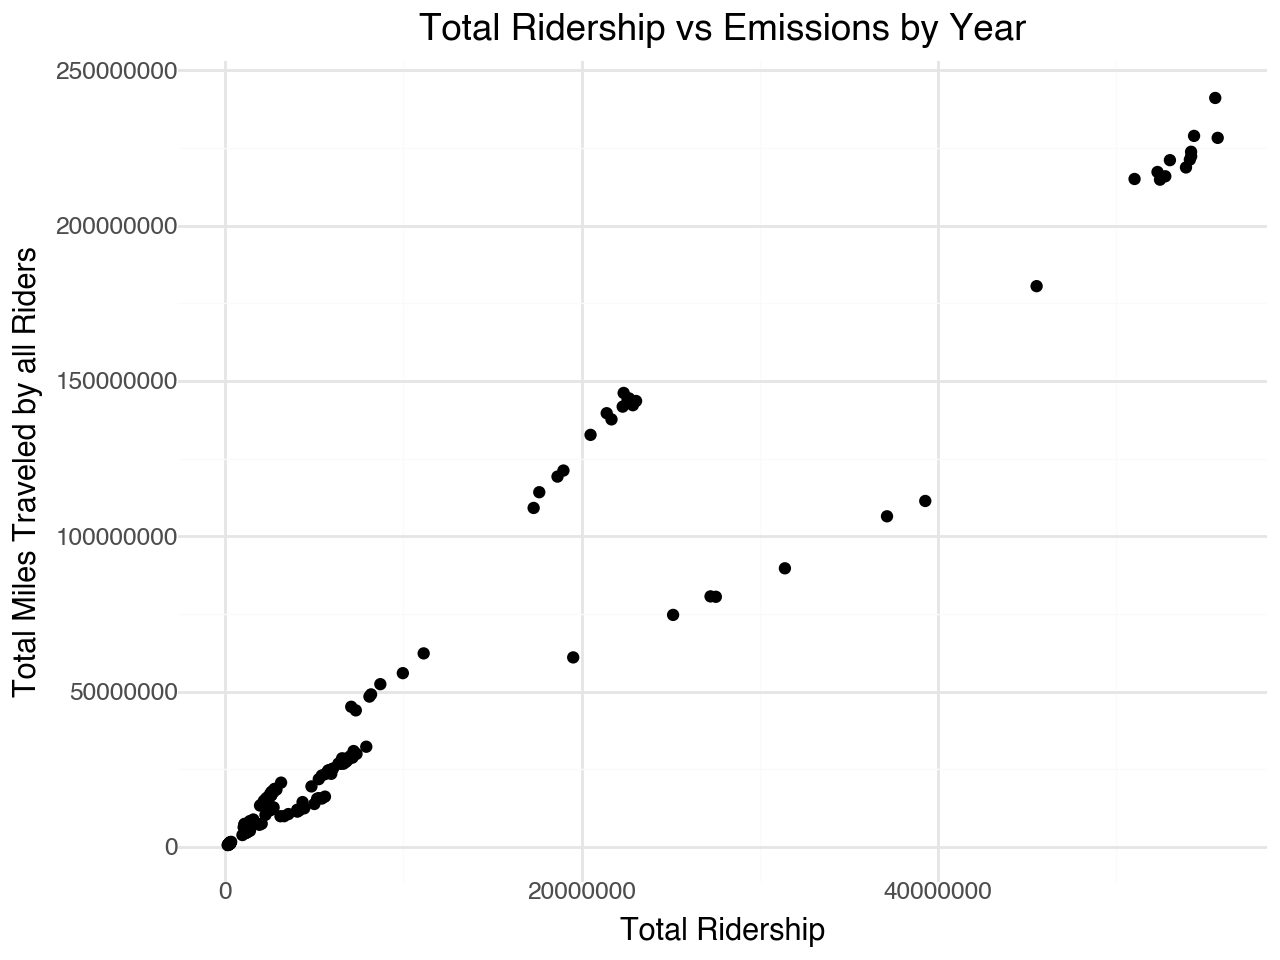

In [88]:
(ggplot(data_clean, aes(x='total_ridership', y='total_miles')) +
                     geom_point() +
                     labs(x = "Total Ridership",y = "Total Miles Traveled by all Riders", title='Total Ridership vs Emissions by Year') +
                     theme_minimal())

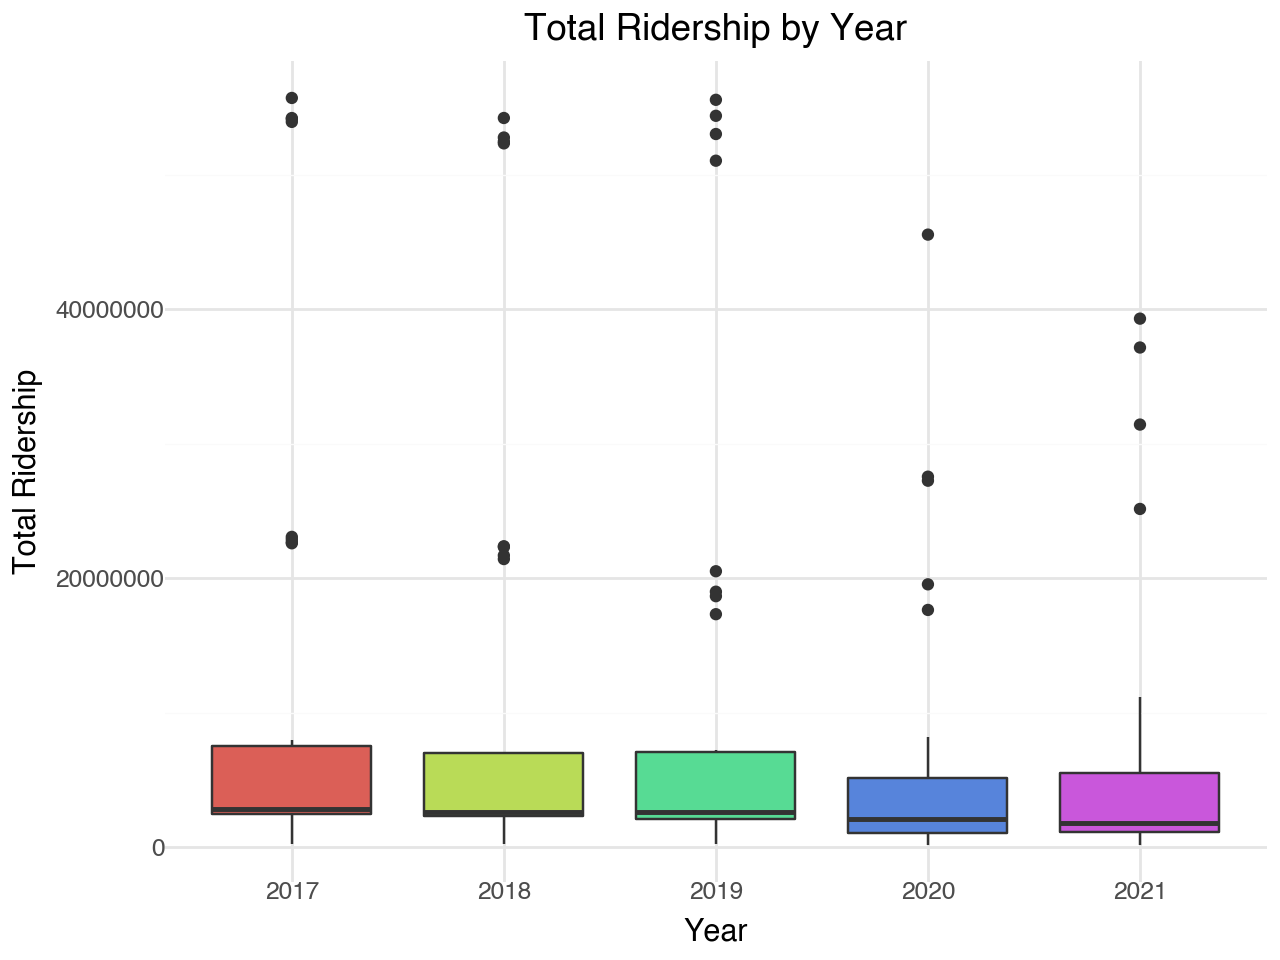

In [95]:
(ggplot(data_clean, aes(x='factor(year)', y='total_ridership', fill = 'factor(year)')) +
                      geom_boxplot(show_legend=False) +
                      labs(x = "Year", y = "Total Ridership", title='Total Ridership by Year') +
                      theme_minimal() 
                      )

In [81]:
data_clean.head()

,year,quarter,day_type,transportation_type,total_ridership,total_miles,emissions
0,2017,1,weekday,directly operated bus,54133957,221272646,6658.236
1,2017,1,saturday,directly operated bus,6639676,26778396,6658.236
2,2017,1,sunday,directly operated bus,5621850,23463404,6658.236
3,2017,1,weekday,purchased bus,2639171,12454319,6658.236
4,2017,1,saturday,purchased bus,286740,1337732,6658.236


In [9]:
# # filter emission data to state and year range
# filtered_emissions = emissions[(emissions["state-name"] == "California") & 
#                                (emissions["year"].isin(range(2017, 2022))) & 
#                                (emissions["sector-name"] == "Transportation carbon dioxide emissions") &
#                                (emissions["fuel-name"] == "All Fuels")
#                                ]
# filtered_emissions.loc[:, "value"] = ((filtered_emissions["value"] * 0.24))


# # merge datasets
# data_clean = metro.merge(filtered_emissions, on = "year", how = "outer")
# data_clean["total_ridership"] = data_clean["total_ridership"].replace(',', '', regex=True).astype(float)
# data_clean["total_miles"] = data_clean["total_miles"].replace(',', '', regex=True).astype(float)


# #divide carbon evenly by quarter

# # grouped = data_clean.groupby(['year', 'quarter'])['total_ridership'].sum().reset_index()

# # data_clean = pd.merge(data_clean, grouped, on=['year', 'quarter'], how='left')

# # data_clean["co2"] = (data_clean["value"]/data_clean["total_ridership_y"])*data_clean["total_ridership_x"]

